Open cv tutorial example

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image and cascade xml

In [2]:
# Load cascade classifier
faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') 
eyeCascade = cv2.CascadeClassifier('haarcascade_eye.xml')

#load image and cpnvert to gray scale
image = cv2.imread('abba.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# set the algorythm preprocessing stage of test image
#faces = faceCascade.detectMultiScale(gray, 1.3, 5) 

# Hyper tuned algorythm
faces = faceCascade.detectMultiScale(image,
                                        scaleFactor = 1.10, # face resizing for model matching increases the time 
                                        minNeighbors = 4, 
                                        minSize = (30,30),
                                        flags = cv2.CASCADE_SCALE_IMAGE)

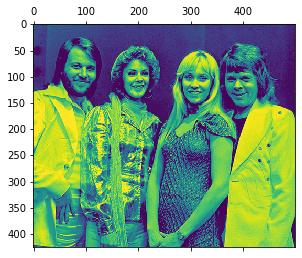

In [3]:
# show preprocessed test image 
plt.matshow(gray)

# Detect Face

In [4]:
# Draw a rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2) # draw the rectangle
    # show results
    cv2.imshow('img',image) # show the image with drawn rectangles around faces

# close operation
cv2.waitKey(0) # wait for the close key
cv2.destroyAllWindows() # close the window

# Detect Eyes and Face

In [5]:
#face cascade was optimize during the first test

for (x,y,w,h) in faces:
    cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2) # draw rectangles around the face
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = image[y:y+h, x:x+w]
    eyes = eyeCascade.detectMultiScale(roi_gray, 1.05,1) # eye cascade is optimized here to detect the eyes
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2) # draw rectangles around the eyes



cv2.imshow('img',image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Video Capture Face detect

press q to quit

In [6]:
video_capture = cv2.VideoCapture(0)
while True:
    # Capture frame-by-frame
    ret, frame = video_capture.read()

    gray = cv2.cvtColor(frame,  cv2.COLOR_BGR2GRAY)

    # hyper parameters for face detection
    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.05,
        minNeighbors=4,
        minSize=(30, 30),
        flags= cv2.CASCADE_SCALE_IMAGE
    )
    cv2.putText(frame, "PRESS Q to quit", (100,100), cv2.FONT_HERSHEY_COMPLEX, 0.7, (255,0,0), 2,cv2.LINE_AA) 


    # Draw a rectangle around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        # hyper parameters for eye detection
        eyes = eyeCascade.detectMultiScale(roi_gray,1.01,5) 
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
            
    # Display the resulting frame
    cv2.imshow('Video', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        # When everything is done, release the capture
        break
        
video_capture.release()
cv2.destroyAllWindows()